# Nearest Neighbors

In this example, we will train a nearest neighbor regressor on a toy 1d regression dataset to predict the sine function.

## 1. Generate the toy dataset

In [1]:
import numpy as np

# Fix random seed
np.random.seed(0)

# Set number of examples
n_samples = 100

# Generate inputs X uniformly from [0, 5) and sort them
X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)

# Generate outputs Y = sin(X) + Gaussian noise (mean=0 and std=0.1)
Y = np.sin(X) + np.random.normal(scale=0.1, size=(n_samples, 1))

# Print data shapes and some samples for checking
print(X.shape, Y.shape)
print(X[:5])
print(Y[:5])

(100, 1) (100, 1)
[[0.02347738]
 [0.093949  ]
 [0.10053773]
 [0.10109199]
 [0.19593896]]
[[-0.09303976]
 [ 0.18389351]
 [ 0.14693469]
 [-0.05270448]
 [ 0.34351283]]


## 2. Split data into train/test sets

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape)

(80, 1) (20, 1)


## 3. Visualize the data with matplotlib

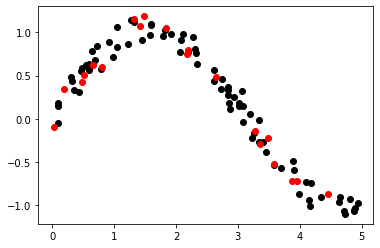

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, color='black') # Plot train points with black color
plt.scatter(X_test, Y_test, color='red') # Plot test points with red color
plt.show() # Show the plot

## 4. Create and train K-NN Regressor on train set

In [4]:
from sklearn import neighbors

# Create the regressor model and fit (train) with the train dataset
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'uniform')
knn.fit(X_train, Y_train)

KNeighborsRegressor()

## 5. Make predictions on test set

In [5]:
Y_pred = knn.predict(X_test)

print(Y_pred[:5])

[[-0.72785561]
 [ 0.43066351]
 [-0.12476829]
 [ 0.87449296]
 [ 0.87449296]]


## 6. Evaluate the predictions

For regression, we can use mean squared error as the metric for evaluation. Note that our noise has standard deviation $0.1$, so a well trained model should have mean squared error around $0.1^2 = 0.01$.

In [6]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)

print(mse)

0.014835118471817385


## 7. Visualize the trained model

To visualize the trained model, we need to create several points in the input space, make predictions on these points, and plot the predictions.

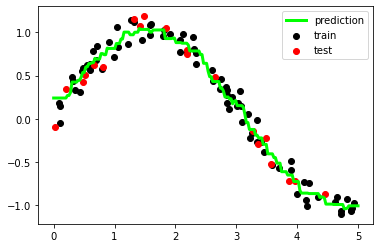

In [7]:
import matplotlib.pyplot as plt

# Generate 200 inputs evenly spaced on [0, 5] and reshape them into a 200 x 1 matrix (each row is an example)
xx = np.linspace(0, 5, 200).reshape(-1, 1)

# Make prediction on these inputs
yy = knn.predict(xx)

# Plot a line connecting these points
plt.plot(xx, yy, color='lime', label='prediction', linewidth=3)

# Plot train points with black color
plt.scatter(X_train, Y_train, color='black', label='train')

# Plot test points with red color
plt.scatter(X_test, Y_test, color='red', label='test')

# Add the legend
plt.legend()

# Show the plot
plt.show()